In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
crime_data = pd.read_csv(r'C:\Users\Santhosh\Desktop\CapstoneProject\Capstone\Crimerateprediction\Crimes_-_2001_to_Present.csv')

In [3]:
crime_data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
8077147,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
8077148,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
8077149,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [4]:
crime_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8077151.0,7.251138e+06,3.630950e+06,634.000000,3.903034e+06,7.247163e+06,1.050030e+07,1.348547e+07
Beat,8077151.0,1.184977e+03,7.035118e+02,111.000000,6.210000e+02,1.034000e+03,1.731000e+03,2.535000e+03
District,8077104.0,1.129740e+01,6.958819e+00,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,7462305.0,2.276916e+01,1.385516e+01,1.000000,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,7463681.0,3.743256e+01,2.154604e+01,0.000000,2.300000e+01,3.200000e+01,5.700000e+01,7.700000e+01
X Coordinate,7988193.0,1.164621e+06,1.698233e+04,0.000000,1.153013e+06,1.166155e+06,1.176389e+06,1.205119e+06
Y Coordinate,7988193.0,1.885846e+06,3.247292e+04,0.000000,1.859117e+06,1.890829e+06,1.909358e+06,1.951622e+06
Year,8077151.0,2.010428e+03,6.634836e+00,2001.000000,2.005000e+03,2.009000e+03,2.016000e+03,2.024000e+03
Latitude,7988193.0,4.184236e+01,8.934593e-02,36.619446,4.176879e+01,4.185612e+01,4.190696e+01,4.202291e+01
Longitude,7988193.0,-8.767142e+01,6.152950e-02,-91.686566,-8.771353e+01,-8.766572e+01,-8.762812e+01,-8.752453e+01


In [5]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [6]:
crime_data.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13087
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Community Area          613470
FBI Code                     0
X Coordinate             88958
Y Coordinate             88958
Year                         0
Updated On                   0
Latitude                 88958
Longitude                88958
Location                 88958
dtype: int64

In [7]:
### Drop the unnessary columns

crime_data_1 = crime_data.drop(['ID' ,'Case Number', 'IUCR', 'Ward', 'FBI Code', 'X Coordinate', 'Y Coordinate'], axis= 1)

In [8]:
crime_data_1

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,Updated On,Latitude,Longitude,Location
0,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,1.0,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,19.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,13.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,11/09/2023 07:30:00 AM,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,5.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,44.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,1214,12.0,28.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
8077147,08/07/2023 06:00:00 PM,0000X W 95TH ST,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,634,6.0,49.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
8077148,06/20/2023 07:00:00 PM,031XX S AVERS AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1031,10.0,30.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
8077149,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,421,4.0,46.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [9]:
### Changing datatypes

crime_data_1['Date'] = pd.to_datetime(crime_data_1['Date'], errors= 'coerce')
crime_data_1['Updated On'] = pd.to_datetime(crime_data_1['Updated On'], errors= 'coerce')

C:\Users\Santhosh\AppData\Local\Temp\ipykernel_3420\1993239232.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data_1['Updated On'] = pd.to_datetime(crime_data_1['Updated On'], errors= 'coerce')


In [10]:
crime_data_1

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,Updated On,Latitude,Longitude,Location
0,2007-08-25 09:22:18,074XX N ROGERS AVE,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,1.0,2007,2015-08-17 15:03:40,NaN,NaN,NaN
1,2021-05-24 15:06:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,19.0,2021,2023-11-18 15:39:49,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,2021-06-26 09:24:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,13.0,2021,2023-11-18 15:39:49,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,2023-11-09 07:30:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,5.0,2023,2023-11-18 15:39:49,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,44.0,2023,2023-12-09 15:41:24,41.737751,-87.604856,"(41.737750767, -87.604855911)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,2023-04-18 08:00:00,003XX N JEFFERSON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,1214,12.0,28.0,2023,2023-08-19 15:40:26,41.887589,-87.642827,"(41.887589411, -87.642826595)"
8077147,2023-08-07 18:00:00,0000X W 95TH ST,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,634,6.0,49.0,2023,2023-08-19 15:40:26,41.721698,-87.625345,"(41.72169837, -87.625345212)"
8077148,2023-06-20 19:00:00,031XX S AVERS AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1031,10.0,30.0,2023,2023-08-19 15:40:26,41.836324,-87.720674,"(41.836323827, -87.720674149)"
8077149,2023-08-26 00:00:00,078XX S SOUTH SHORE DR,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,421,4.0,46.0,2023,2023-09-02 15:41:45,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [11]:
crime_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 15 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Block                 object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Community Area        float64       
 10  Year                  int64         
 11  Updated On            datetime64[ns]
 12  Latitude              float64       
 13  Longitude             float64       
 14  Location              object        
dtypes: bool(2), datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 816.5+ MB


In [12]:
crime_data_1.isnull().sum()

Date                         0
Block                        0
Primary Type                 0
Description                  0
Location Description     13087
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Community Area          613470
Year                         0
Updated On                   0
Latitude                 88958
Longitude                88958
Location                 88958
dtype: int64

In [13]:
updated_data = crime_data_1.dropna()

In [14]:
updated_data

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,Updated On,Latitude,Longitude,Location
1,2021-05-24 15:06:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,19.0,2021,2023-11-18 15:39:49,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,2021-06-26 09:24:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,13.0,2021,2023-11-18 15:39:49,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,2023-11-09 07:30:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,5.0,2023,2023-11-18 15:39:49,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,44.0,2023,2023-12-09 15:41:24,41.737751,-87.604856,"(41.737750767, -87.604855911)"
6,2023-09-06 17:00:00,002XX N Wells st,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1.0,32.0,2023,2023-11-04 15:40:18,41.886018,-87.633938,"(41.886018055, -87.633937881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,2023-04-18 08:00:00,003XX N JEFFERSON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,1214,12.0,28.0,2023,2023-08-19 15:40:26,41.887589,-87.642827,"(41.887589411, -87.642826595)"
8077147,2023-08-07 18:00:00,0000X W 95TH ST,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,634,6.0,49.0,2023,2023-08-19 15:40:26,41.721698,-87.625345,"(41.72169837, -87.625345212)"
8077148,2023-06-20 19:00:00,031XX S AVERS AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1031,10.0,30.0,2023,2023-08-19 15:40:26,41.836324,-87.720674,"(41.836323827, -87.720674149)"
8077149,2023-08-26 00:00:00,078XX S SOUTH SHORE DR,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,421,4.0,46.0,2023,2023-09-02 15:41:45,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [15]:
final_data = updated_data.reset_index(level=None, drop= False, inplace= False, col_level=0, col_fill='')

In [16]:
final_data

,index,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,Updated On,Latitude,Longitude,Location
0,1,2021-05-24 15:06:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,19.0,2021,2023-11-18 15:39:49,41.917838,-87.755969,"(41.917838056, -87.755968972)"
1,2,2021-06-26 09:24:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,13.0,2021,2023-11-18 15:39:49,41.995219,-87.713355,"(41.995219444, -87.713354912)"
2,3,2023-11-09 07:30:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,5.0,2023,2023-11-18 15:39:49,41.952345,-87.677975,"(41.952345086, -87.677975059)"
3,4,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,44.0,2023,2023-12-09 15:41:24,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,6,2023-09-06 17:00:00,002XX N Wells st,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1.0,32.0,2023,2023-11-04 15:40:18,41.886018,-87.633938,"(41.886018055, -87.633937881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375529,8077146,2023-04-18 08:00:00,003XX N JEFFERSON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,1214,12.0,28.0,2023,2023-08-19 15:40:26,41.887589,-87.642827,"(41.887589411, -87.642826595)"
7375530,8077147,2023-08-07 18:00:00,0000X W 95TH ST,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,634,6.0,49.0,2023,2023-08-19 15:40:26,41.721698,-87.625345,"(41.72169837, -87.625345212)"
7375531,8077148,2023-06-20 19:00:00,031XX S AVERS AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1031,10.0,30.0,2023,2023-08-19 15:40:26,41.836324,-87.720674,"(41.836323827, -87.720674149)"
7375532,8077149,2023-08-26 00:00:00,078XX S SOUTH SHORE DR,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,421,4.0,46.0,2023,2023-09-02 15:41:45,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [17]:
FinalData = final_data.drop('index', axis= 1)

In [18]:
FinalData.insert(0, "Registred Case", range(1, 1+len(FinalData)))

### Temprol Analysis

In [19]:
FinalData

,Registred Case,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,Updated On,Latitude,Longitude,Location
0,1,2021-05-24 15:06:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,19.0,2021,2023-11-18 15:39:49,41.917838,-87.755969,"(41.917838056, -87.755968972)"
1,2,2021-06-26 09:24:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,13.0,2021,2023-11-18 15:39:49,41.995219,-87.713355,"(41.995219444, -87.713354912)"
2,3,2023-11-09 07:30:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,5.0,2023,2023-11-18 15:39:49,41.952345,-87.677975,"(41.952345086, -87.677975059)"
3,4,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,44.0,2023,2023-12-09 15:41:24,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,5,2023-09-06 17:00:00,002XX N Wells st,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1.0,32.0,2023,2023-11-04 15:40:18,41.886018,-87.633938,"(41.886018055, -87.633937881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375529,7375530,2023-04-18 08:00:00,003XX N JEFFERSON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,1214,12.0,28.0,2023,2023-08-19 15:40:26,41.887589,-87.642827,"(41.887589411, -87.642826595)"
7375530,7375531,2023-08-07 18:00:00,0000X W 95TH ST,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,634,6.0,49.0,2023,2023-08-19 15:40:26,41.721698,-87.625345,"(41.72169837, -87.625345212)"
7375531,7375532,2023-06-20 19:00:00,031XX S AVERS AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1031,10.0,30.0,2023,2023-08-19 15:40:26,41.836324,-87.720674,"(41.836323827, -87.720674149)"
7375532,7375533,2023-08-26 00:00:00,078XX S SOUTH SHORE DR,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,421,4.0,46.0,2023,2023-09-02 15:41:45,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [20]:
FinalData['Year'] = FinalData['Date'].dt.year
crime_count_per_year = FinalData['Year'].value_counts().sort_index()

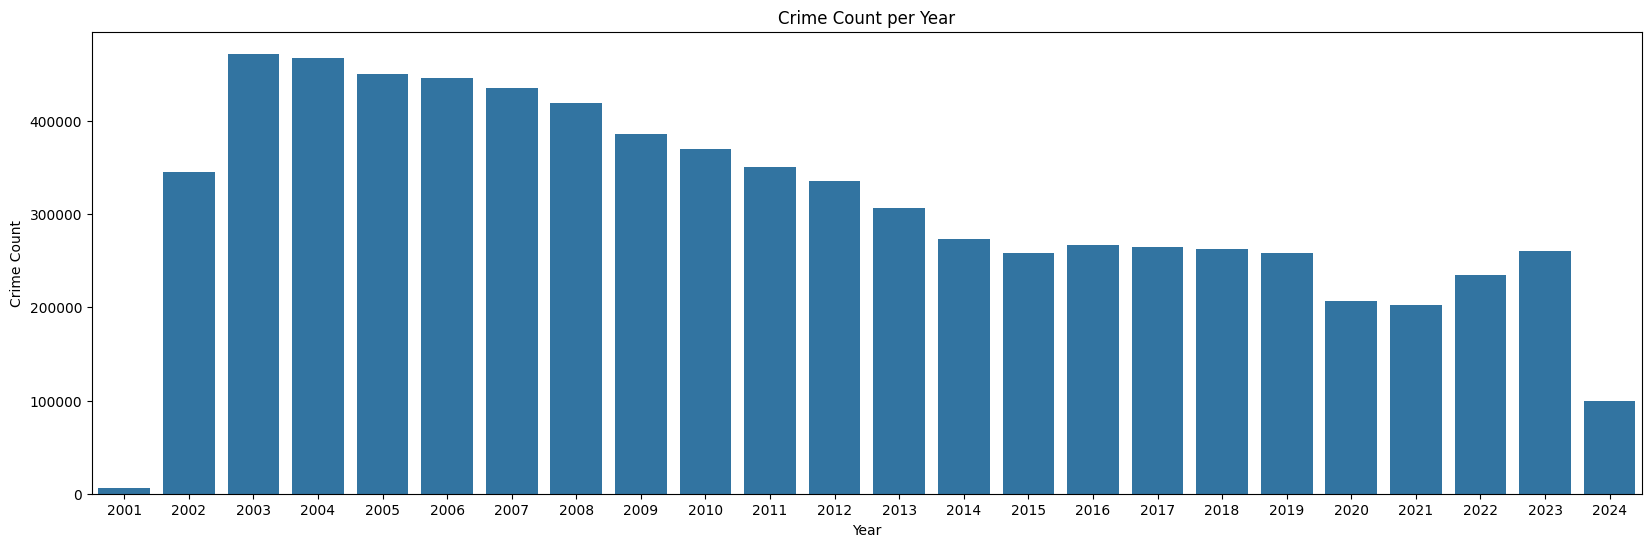

In [21]:
plt.figure(figsize=(20, 6))
sns.barplot(x=crime_count_per_year.index, y=crime_count_per_year.values)
plt.title('Crime Count per Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

From the Crime Count per Year charts lowest crime count in 2001 & highest crime count in 2003, Year by year the crime rate is reducing.

In [22]:
FinalData['Dates']= pd.to_datetime(FinalData['Date']).dt.date
FinalData['Time']= pd.to_datetime(FinalData['Date']).dt.time


In [23]:
FinalData

,Registred Case,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,Updated On,Latitude,Longitude,Location,Dates,Time
0,1,2021-05-24 15:06:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,19.0,2021,2023-11-18 15:39:49,41.917838,-87.755969,"(41.917838056, -87.755968972)",2021-05-24,15:06:00
1,2,2021-06-26 09:24:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,13.0,2021,2023-11-18 15:39:49,41.995219,-87.713355,"(41.995219444, -87.713354912)",2021-06-26,09:24:00
2,3,2023-11-09 07:30:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,5.0,2023,2023-11-18 15:39:49,41.952345,-87.677975,"(41.952345086, -87.677975059)",2023-11-09,07:30:00
3,4,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,44.0,2023,2023-12-09 15:41:24,41.737751,-87.604856,"(41.737750767, -87.604855911)",2023-11-12,07:59:00
4,5,2023-09-06 17:00:00,002XX N Wells st,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1.0,32.0,2023,2023-11-04 15:40:18,41.886018,-87.633938,"(41.886018055, -87.633937881)",2023-09-06,17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375529,7375530,2023-04-18 08:00:00,003XX N JEFFERSON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,1214,12.0,28.0,2023,2023-08-19 15:40:26,41.887589,-87.642827,"(41.887589411, -87.642826595)",2023-04-18,08:00:00
7375530,7375531,2023-08-07 18:00:00,0000X W 95TH ST,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,634,6.0,49.0,2023,2023-08-19 15:40:26,41.721698,-87.625345,"(41.72169837, -87.625345212)",2023-08-07,18:00:00
7375531,7375532,2023-06-20 19:00:00,031XX S AVERS AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1031,10.0,30.0,2023,2023-08-19 15:40:26,41.836324,-87.720674,"(41.836323827, -87.720674149)",2023-06-20,19:00:00
7375532,7375533,2023-08-26 00:00:00,078XX S SOUTH SHORE DR,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,421,4.0,46.0,2023,2023-09-02 15:41:45,41.752631,-87.548737,"(41.752631346, -87.548737069)",2023-08-26,00:00:00


In [25]:
crime_type = FinalData['Primary Type'].value_counts().sort_index()
descriptions = FinalData['Description'].value_counts().sort_index()



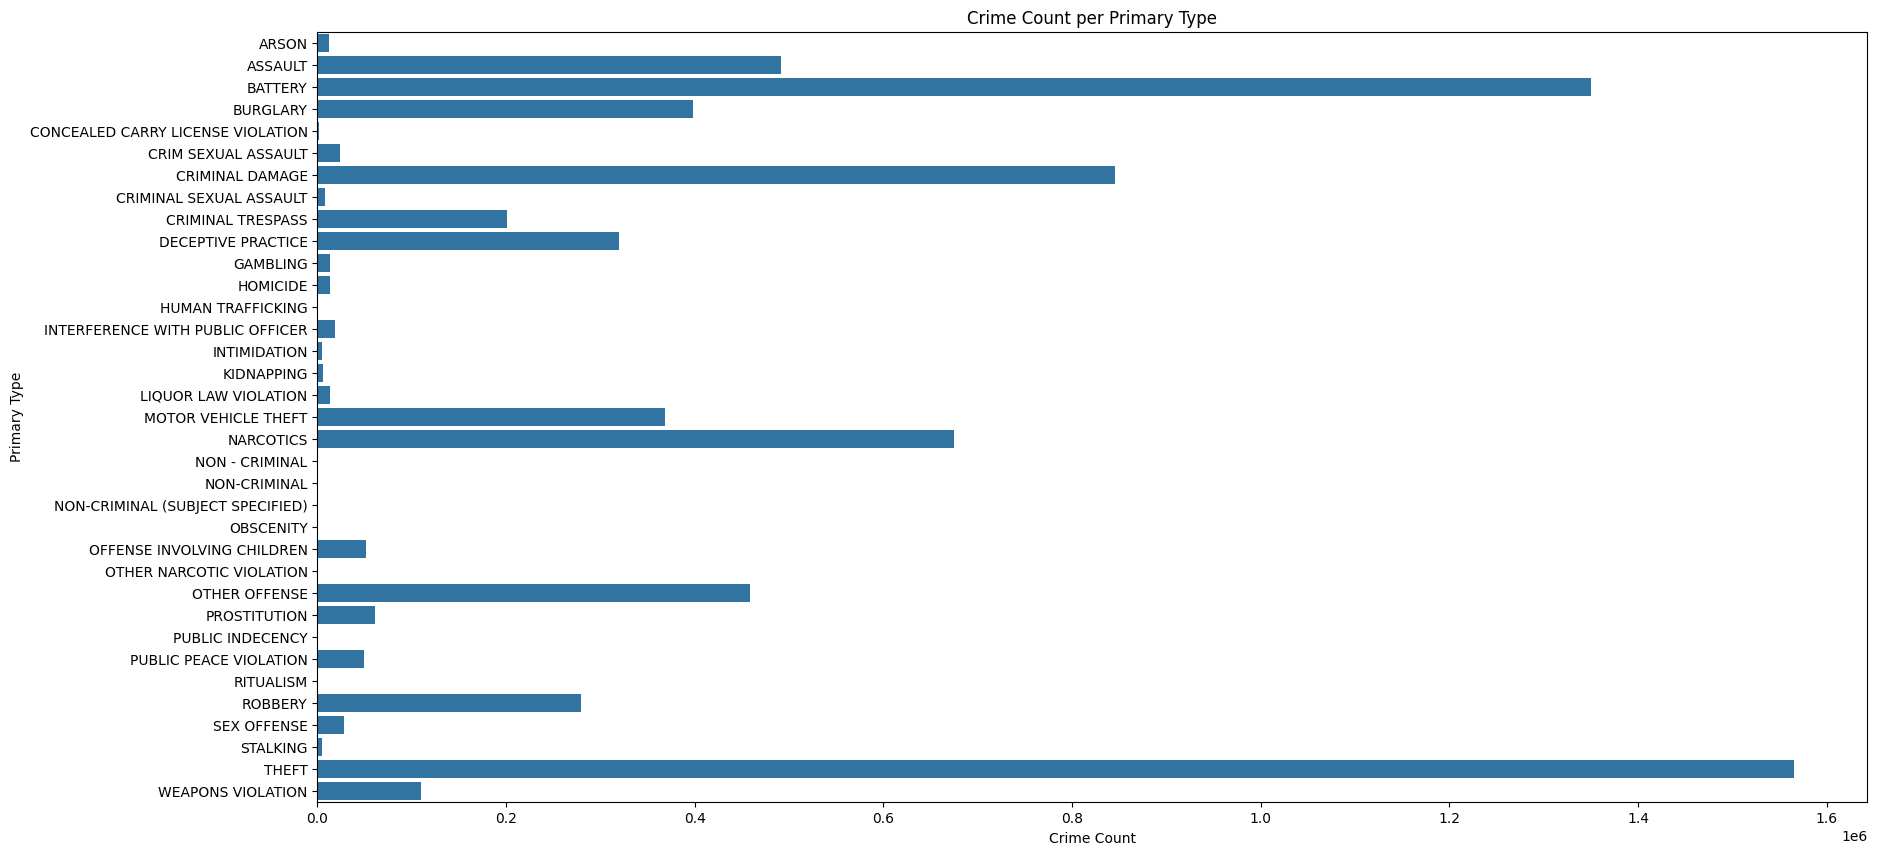

In [27]:
plt.figure(figsize=(20, 10))
sns.barplot(y= crime_type.index, x= crime_type.values)
plt.title('Crime Count per Primary Type')
plt.xlabel('Crime Count')
plt.ylabel('Primary Type')
plt.show()

